# D2R docking
---

In [22]:
import pandas as pd

profis_scores_2  = pd.read_csv('esteraze/gnina_out_krfp_profis_bounds2/scores.csv')
chembl_scores = pd.read_csv('esteraze/gnina_out_chembl/scores.csv')
d2_scores = pd.read_csv('esteraze/gnina_out_d2_set/scores.csv')

profis_scores_2['source'] = 'PROFIS'
chembl_scores['source'] = 'ChEMBL'
d2_scores['source'] = 'D2R'

scores = pd.concat([profis_scores_2, d2_scores, chembl_scores])

In [38]:
import rdkit.Chem as Chem
import rdkit.Chem.rdMolDescriptors as rdMolDescriptors
import pandas as pd

df = pd.read_parquet('../data/RNN_dataset_KRFP_val_10.parquet')
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df['mw'] = df['mol'].apply(rdMolDescriptors.CalcExactMolWt)
df = df[df['mw'] > 300]
df = df.sample(150)
df['idx'] = range(len(df))
df = df[['smiles', 'idx']]
df.to_csv('D2/chembl.smi', index=False, sep='\t', header=False)

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

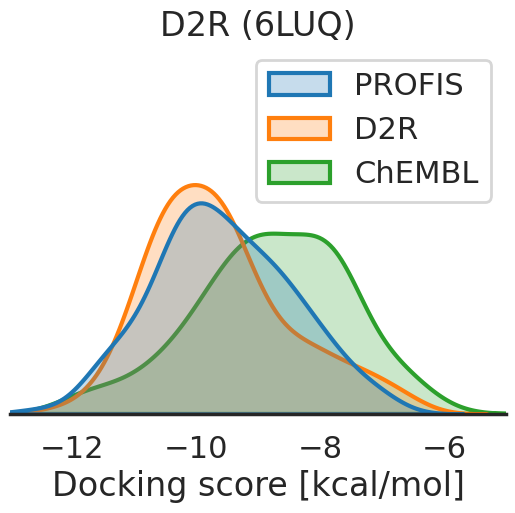

In [23]:
# plot the scores distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('talk')

lw = 3

ax = sns.kdeplot(data=scores, x='score', hue='source', fill=True, linewidth=lw, common_norm=False)
ax.get_legend().set_title("")
plt.ylabel('')
plt.xlabel('Docking score [kcal/mol]')
plt.xlim(-13, -5)
plt.ylim(0, 0.6)
plt.yticks([])
sns.despine(left=True)

plt.savefig('D2/docking_scores_esteraze.png', dpi=300, bbox_inches='tight')

# Esteraze docking

In [25]:
import pandas as pd

#profis_scores = pd.read_csv('D2/gnina_out_krfp_profis/scores.csv')['score']
chembl_scores = pd.read_csv('esteraze/gnina_out_chembl/scores.csv')['score']
#d2_scores = pd.read_csv('D2/gnina_out_d2_set/scores.csv')['score']

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

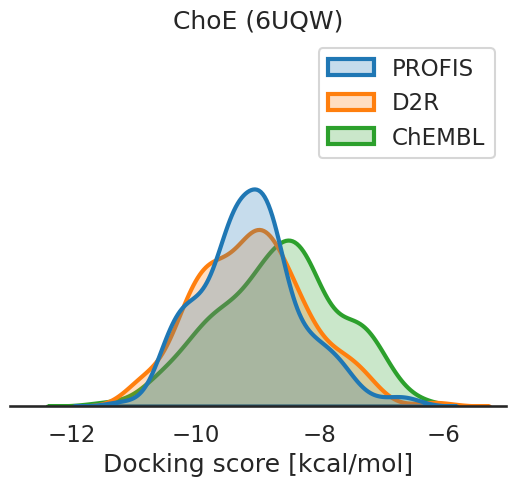

In [36]:
# plot the scores distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('talk')

#sns.kdeplot(d2_scores, color='hotpink', label='D2R', fill=True)
sns.kdeplot(chembl_scores, color='skyblue', label='ChEMBL', fill=True)
#sns.kdeplot(profis_scores, color='limegreen', label='PROFIS', fill=True)
plt.ylabel('')
plt.xlabel('Docking score [kcal/mol]')
plt.xlim(-13, -5)
plt.ylim(0, 0.5)
plt.yticks([])
sns.despine(left=True)

# add legend

plt.legend(loc='upper right')